# Feature Engineering: Feature Creation

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [2]:
# Hypothesis 1: Spam messages are longer than non-spam messages.

# counting only the number of characters in the text message (thus, without the spaces)
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

label                                          body_text  body_len
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128
1   ham  Nah I don't think he goes to usf, he lives aro...        49
2   ham  Even my brother is not like to speak with me. ...        62
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135

### Create feature for % of text that is punctuation

In [3]:
# Hypothesis 2: Real messages contain less punctuation than spam.

# use the raw text rather than cleaned text since the latter doesn't have a punctuation
import string

# function to coun the number of punctuation in a text
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    # returning the percentage of text that is punctuation
    return round(count / (len(text) - text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

# note: other feature to be extracted, for instance, is the number of words that are capitalized

label                                          body_text  body_len  punct%
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
1   ham  Nah I don't think he goes to usf, he lives aro...        49     4.1
2   ham  Even my brother is not like to speak with me. ...        62     3.2
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28     7.1
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135     4.4

### Evaluate created features

In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

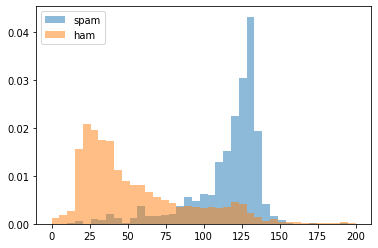

In [9]:
# evaluating spam and ham message length feature

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_len'], bins=bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins=bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

# important note: bins=bins instead of just bins, and density=True rather than normed=True, as in the video tutorial
# the matplotlib version used here is latest compared to that in the video tutorial

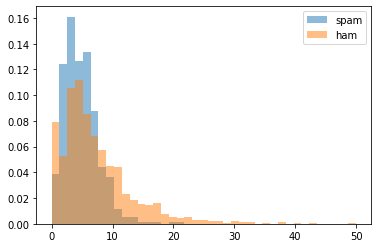

In [10]:
# evaluating percentage of text feature

bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct%'], bins=bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins=bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

Based on the evaluation, the first hypothesis (that spam tends to be longer than ham) is correct, so it can provide value to the ML model to be created. On the contrary, the second hypothesis (that there is less punctuation in ham compared to spam) is not that accurate; thus, it's not clear if this would provide value to the model. However, we can still leave this second feature in the model to see what value can the model really extract from this feature.